In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv("M:\Machine Learning Start with CIT\GitHub Projects Machine Learning Algorithm\linear regression\housePrice.csv")

In [6]:
df.head()

,size,bedroom,price
0,850,2,127000
1,900,2,139000
2,1000,3,169000
3,1200,3,185000
4,1500,3,210000


# Data clean


In [7]:
df.shape

(12, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   size     12 non-null     int64
 1   bedroom  12 non-null     int64
 2   price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

size       0
bedroom    0
price      0
dtype: int64

In [11]:
df.describe()

,size,bedroom,price
count,12.000000,12.000000,12.000000
mean,1779.166667,3.666667,250000.000000
std,730.335643,1.073087,85962.994152
min,850.000000,2.000000,127000.000000
25%,1150.000000,3.000000,181000.000000
50%,1750.000000,4.000000,255000.000000
75%,2200.000000,4.250000,303750.000000
max,3000.000000,5.000000,390000.000000


# vizulaization


In [12]:
df.head()

,size,bedroom,price
0,850,2,127000
1,900,2,139000
2,1000,3,169000
3,1200,3,185000
4,1500,3,210000


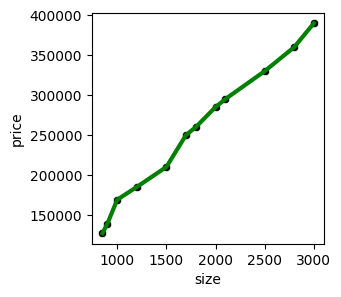

In [13]:
plt.figure(figsize=(3,3))
sns.scatterplot(data=df, x='size', y='price', color='black')
plt.plot(df['size'],df['price'], color='green', lw=3)
plt.show()

Text(0, 0.5, 'price')

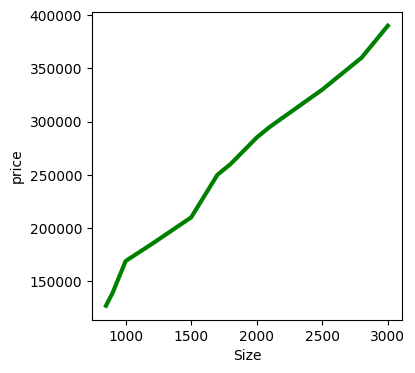

In [14]:
plt.figure(figsize=(4,4))
plt.plot(df['size'],df['price'], color='green', lw=3)
plt.xlabel('Size')
plt.ylabel('price')

<Axes: >

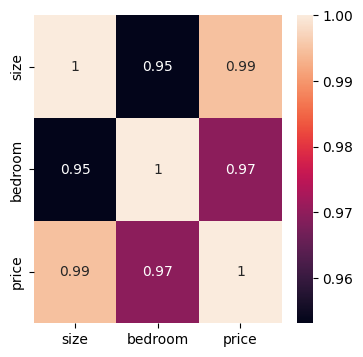

In [15]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(), annot=True)

In [16]:
#feature/Target split
x = df[['size', 'bedroom']]
y = df[['price']]

In [17]:
x.head()

,size,bedroom
0,850,2
1,900,2
2,1000,3
3,1200,3
4,1500,3


In [18]:
y.head()

,price
0,127000
1,139000
2,169000
3,185000
4,210000


In [19]:
#Train–Test Split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
xtrain.head()

,size,bedroom
8,2100,4
5,1700,4
2,1000,3
1,900,2
11,3000,5


In [21]:
ytrain.head()

,price
8,295000
5,250000
2,169000
1,139000
11,390000


In [22]:
xtest.head()

,size,bedroom
10,2800,5
9,2500,5
0,850,2


In [23]:
ytest.head()

,price
10,360000
9,330000
0,127000


In [24]:
#model Implementation
lr = LinearRegression()

In [25]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
#train the model
model = lr.fit(xtrain, ytrain)

In [27]:
#check the score
model.score(xtrain, ytrain)

0.9981118689470705

In [28]:
model.score(xtest, ytest)

0.9837585289522192

In [29]:
#prediction Generate
pred_y = model.predict(xtest).ravel()
pred_y

array([374234.90455785, 346532.52824309, 133776.78223607])

In [30]:
x.shape, xtest.shape

((12, 2), (3, 2))

In [31]:
pred_y = model.predict([[2100,4]])
pred_y

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[289465.13439813]])

In [32]:
#Model Parameter
m = model.coef_
print(f"coefficient (m): {m}")

coefficient (m): [[   92.34125438 20130.89209194]]


In [33]:
c = model.intercept_
print(f"Intercept (c): {c}")

Intercept (c): [15024.93182704]


In [34]:
df['predict'] = model.predict(df[['size','bedroom']])
df.head()

,size,bedroom,price,predict
0,850,2,127000,133776.782236
1,900,2,139000,138393.844955
2,1000,3,169000,167758.862485
3,1200,3,185000,186227.113362
4,1500,3,210000,213929.489677


In [35]:
df['error'] = df['price'] - df['predict']
df.head()

,size,bedroom,price,predict,error
0,850,2,127000,133776.782236,-6776.782236
1,900,2,139000,138393.844955,606.155045
2,1000,3,169000,167758.862485,1241.137515
3,1200,3,185000,186227.113362,-1227.113362
4,1500,3,210000,213929.489677,-3929.489677


In [36]:
predict_y = model.predict(xtest).ravel()

In [37]:
#model Performance
mae = mean_absolute_error(ytest,predict_y)
mae

12514.738345669408

In [38]:
mse = mean_squared_error(ytest, predict_y)
mse

173960591.7848867

In [39]:
r_score = r2_score(ytest, predict_y)
r_score

0.9837585289522192

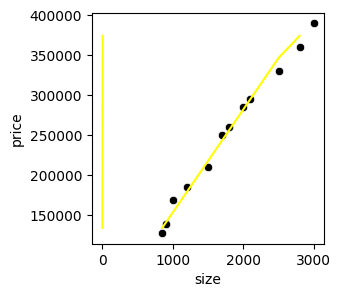

In [40]:
plt.figure(figsize=(3,3))
sns.scatterplot(data=df, x='size', y='price', color='black')
plt.plot(xtest, predict_y, color='yellow')
plt.show()